<a href="https://colab.research.google.com/github/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/blob/master/carrinho_compras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [57]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt


**Read csv**

In [58]:
url = "https://raw.githubusercontent.com/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/master/amostra.csv"
df = pd.read_csv("https://raw.githubusercontent.com/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/master/amostra.csv", sep=';')
df

,produto,valor,prioridade,categoria,valor nutritivo
0,água,"R$ 1,99",5,bebidas,5
1,cerveja,"R$ 3,99",2,bebidas,1
2,refrigerante 2L,"R$ 6,00",5,bebidas,1
3,vodka,"R$ 30,00",1,bebidas,1
4,vinho,"R$ 60,00",2,bebidas,1
5,carne bovina,"R$ 48,00",4,carne,4
6,frango,"R$ 25,00",4,carne,5
7,miúdo,"R$ 35,00",1,carne,3
8,peixe,"R$ 35,00",4,carne,4
9,porco,"R$ 30,00",4,carne,3


**Add new column**

In [59]:
# df['valor_nutricional'] = np.random.randint(1,5, size = df.shape[0])

**Transform the 'value' column in float**

In [60]:
df.valor = df.valor.apply(lambda x: float(x.replace(',','.')[2:]))
df.valor.sum()

528.48

**Initial population**

In [61]:
solutions_per_pop = 600
threshold = 30
num_generations = 20
item_number = np.arange(1,40)
pop_size = (solutions_per_pop, df.shape[0])
print('Population size: {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
print('Initial population: \n{}'.format(initial_population))

Population size: (600, 39)
Initial population: 
[[1 1 0 ... 1 1 0]
 [1 1 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 0 0 1]]


In [62]:
def cal_fitness(value, nutritious, priority, population, threshold):

    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        total_nutritious = np.sum(population[i] * nutritious)
        total_value = np.sum(population[i] * value)
        total_priority = np.sum(population[i] * priority)

        total_profit = total_nutritious * 2  + total_priority

        if total_profit < 10000 and total_profit > -10000:
          if total_value <= threshold:
              fitness[i] = total_profit
          else :
              fitness[i] = (threshold - total_value) * 3 + total_profit

   
    return fitness.astype(int)

In [63]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [64]:
def crossover(parents, num_offsprings):
    #offsprings = np.random.randint(2, size = (num_offsprings, parents.shape[1]))
    offsprings = np.zeros((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.80
    i=-1
    while (i < num_offsprings - 1):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        i += 1
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
    return offsprings    

In [65]:
def mutation(offsprings):
    #print('off',offsprings)
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.20
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)   
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    #print(mutants)
    return mutants   

In [66]:
def optimize(value, nutritious, priority, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(value, nutritious, priority, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(value, nutritious, priority, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [67]:

parameters, fitness_history = optimize(df.valor, df['valor nutritivo'], df.prioridade, initial_population, pop_size, num_generations, threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
# print('fitness history: {}'.format(fitness_history))
selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print(' {} - Valor nutricional: {} - Valor: R$ {} - Prioridade:{}\n'.format(df.produto.iloc[selected_items[0][i] - 1], df['valor nutritivo'].iloc[selected_items[0][i] - 1], 
                                   df.valor.iloc[selected_items[0][i] - 1],  df.prioridade.iloc[selected_items[0][i] - 1]))

GENERATION 0 ------------------------------------

GENERATION 1 ------------------------------------

GENERATION 2 ------------------------------------

GENERATION 3 ------------------------------------

GENERATION 4 ------------------------------------

GENERATION 5 ------------------------------------

GENERATION 6 ------------------------------------

GENERATION 7 ------------------------------------

GENERATION 8 ------------------------------------

GENERATION 9 ------------------------------------

GENERATION 10 ------------------------------------

GENERATION 11 ------------------------------------

GENERATION 12 ------------------------------------

GENERATION 13 ------------------------------------

GENERATION 14 ------------------------------------

GENERATION 15 ------------------------------------

GENERATION 16 ------------------------------------

GENERATION 17 ------------------------------------

GENERATION 18 ------------------------------------

GENERATION 19 --------

**Fitness through the generations**

mean: [-517.71, -358.56, -222.61, -86.63, 4.19, 7.88, 13.22, 17.8, 22.78, 27.32, 32.32, 37.7, 41.76, 44.59, 47.43, 48.17, 51.43, 52.68, 57.77, 61.93] - max: [-137, 14, 35, 44, 57, 57, 57, 57, 57, 57, 68, 68, 74, 78, 78, 78, 79, 79, 80, 86] - min: [-1038, -658, -567, -479, -20, -132, -113, -93, -116, -144, -100, -124, -115, -89, -123, -123, -102, -86, -83, -101]


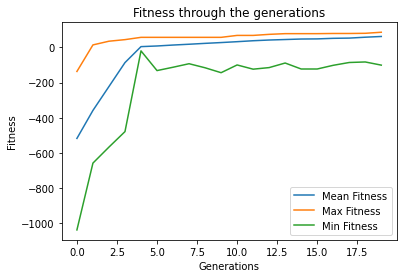

(20, 600)


In [68]:
fitness_history_mean = [round(np.mean(fitness),2) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
fitness_history_min = [np.min(fitness) for fitness in fitness_history]
print('mean: {} - max: {} - min: {}'.format(fitness_history_mean, fitness_history_max, fitness_history_min))

plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.plot(list(range(num_generations)), fitness_history_min, label = 'Min Fitness')

plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)